# Exercise 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import svm
%matplotlib inline

In [8]:
class StateVectorMachine:
    def __init__(self,_radius,_width,_distance,_num_of_training_set,
                 _num_of_testing_set):
        self.radius = _radius
        self.width = _width
        self.distance = _distance
        self.num_of_training_set = _num_of_training_set
        self.num_of_testing_set = _num_of_testing_set
        
    def generate_sample(self,_class):
        random_theta = np.pi *  random.random()
        random_r = (self.width*random.random())+(self.radius-self.width)
        if _class is 1:
            x = random_r*np.cos(random_theta)
            y = random_r*np.sin(random_theta) 
            return [x,y,1]
        else:
            random_theta += np.pi
            x = random_r*np.cos(random_theta)+(self.radius-(self.width/2.0))
            y = random_r*np.sin(random_theta)-self.distance
            return [x,y,2]
        
    def get_samples(self,_flag):
        samples = np.empty((0,3))
        
        if _flag is "train":
            _no_of_samples = self.num_of_training_set
        else:
            _no_of_samples = self.num_of_testing_set
        
        """
        - generating number of samples 
        - half samples belongs to region A and 
          remaining half samples belongs to region B
        """
        for i in range(_no_of_samples):
            sample = self.generate_sample(1 if (i<_no_of_samples/2) else 2)
            samples = np.vstack([samples,sample])
        
        #returning samples and desired output
        return samples[:,0:2],samples[:,2:3]
    
    def plot(self,points,output,title):
        plt.figure(figsize=(10, 7))
        plt.grid(True)
        plt.title(title)
        plt.xlabel("x-->")
        plt.ylabel("y-->")
        for index,point in enumerate(points):
            if (output[index] == 1.0):
                plt.plot(point[0],point[1],'r+',label='region a')
            else:
                plt.plot(point[0],point[1],'b+',label='region b')

    def train(self,training_input,desired_output):
        classifier = svm.SVC(kernel='linear')
        classifier.fit(training_input, desired_output)
        return classifier
        

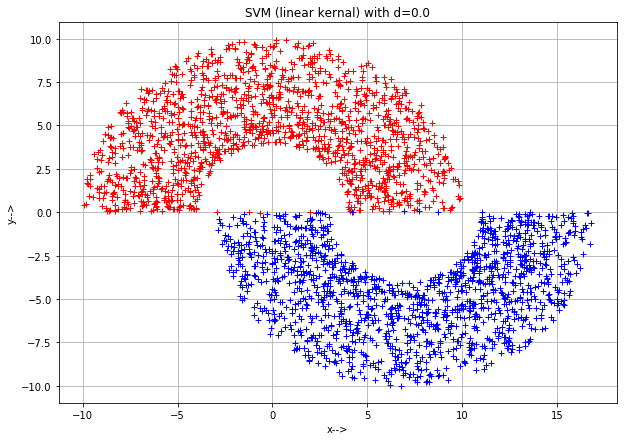

In [9]:
radius = 10.0
width = 6.0
distance = 0.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=0.0")

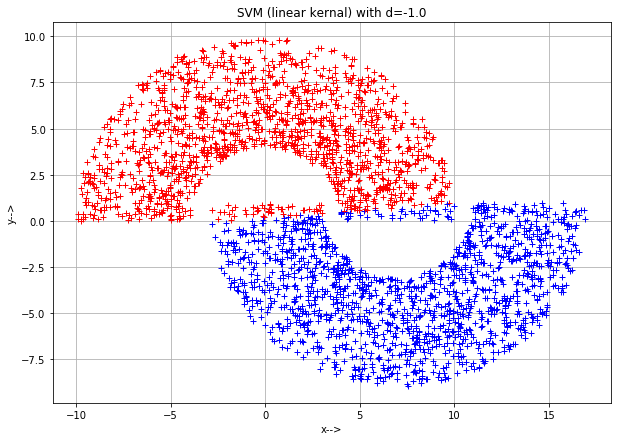

In [10]:
radius = 10.0
width = 6.0
distance = -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=-1.0")

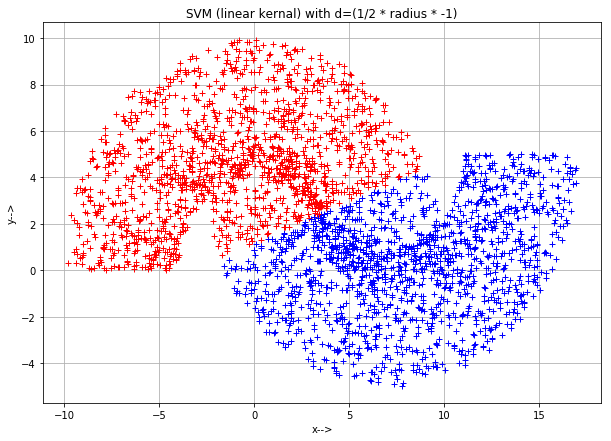

In [11]:
radius = 10.0
width = 6.0
distance = 0.5 * (radius) * -1.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=(1/2 * radius * -1)")

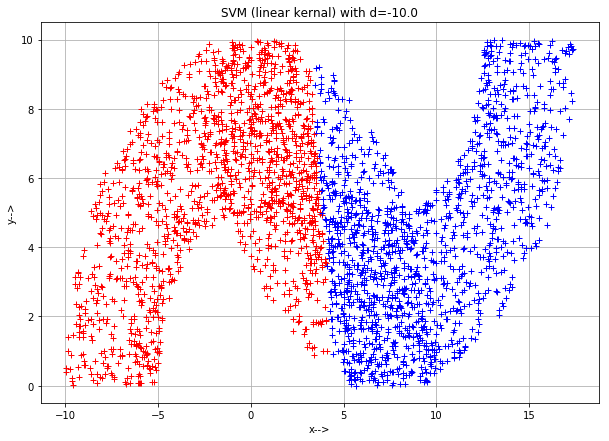

In [12]:
radius = 10.0
width = 5.0
distance = -10.0
num_of_training_samples = 1000
num_of_testing_samples = 3000

# initializing state vector machine with initial parameteres
state_vector_machine = StateVectorMachine(radius,
                                          width,
                                          distance,
                                          num_of_training_samples,
                                          num_of_testing_samples)

# generating random training samples and desired output
training_input,desired_output = state_vector_machine.get_samples("train")

# training the state vector machine
classifier = state_vector_machine.train(training_input,desired_output)

# generating random testing samples 
test_samples,test_desired_output = state_vector_machine.get_samples("test")

# predicting the output for test samples and ploting the result
predicted_output = classifier.predict(test_samples)
state_vector_machine.plot(test_samples,predicted_output,"SVM (linear kernal) with d=-10.0")